<a href="https://colab.research.google.com/github/sr606/Machine-Learning_Practices/blob/main/shraddha_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> <u>Introduction: What is Logistic Regression? </u></b>

### Logistic regression is a statistical method used for binary classification and sometimes for multi-class classification problems. It's a type of regression analysis that is used when the dependent variable is a binary (two-class) outcome, meaning it can take one of two possible values, such as 0 or 1, Yes or No, True or False, etc.


### In **Logistic Regression**, the log-odds of a categorical response being "true" (1) is modeled as a linear combination of the features:

### \begin{align*}
    \log \left({p\over 1-p}\right) &= w_0 + w_1x_1, ..., w_jx_j \nonumber \\
    &= w^Tx \nonumber
\end{align*}

### where:

- ### $w_{0}$ is the intercept term, and $w_1$ to $w_j$ represents the parameters for all the other features (a total of j features).
- ### By convention of we can assume that $x_0 = 1$, so that we can re-write the whole thing using the matrix notation $w^Tx$.

### This is called the **logit function**. The equation can be re-arranged into the **logistic function**:

### $$p = \frac{e^{w^Tx}} {1 + e^{w^Tx}}$$

### Or in the more commonly seen form:

### $$h_w(x) = \frac{1}{ 1 + e^{-w^Tx} }$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
%matplotlib inline

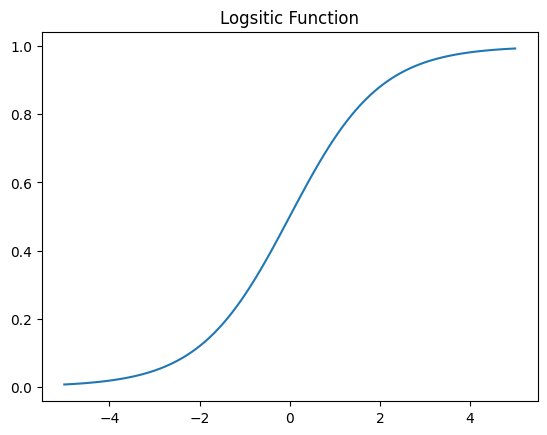

In [ ]:
x_values = np.linspace(-5, 5, 100)
y_values = [1 / (1 + np.exp(-x)) for x in x_values]
plt.plot(x_values, y_values)
plt.title('Logsitic Function')
plt.show()

### The **logistic function** has some nice properties. The y-value represents the probability and it is always bounded between 0 and 1, which is want we wanted for probabilities. For an x value of 0 you get a 0.5 probability. Also as you get more positive x value you get a higher probability, on the other hand, a more negative x value results in a lower probability.

# <b> <u> Implementing Logistic Regression in Python </u></b>

### Let us now start implementing what we learned from the previous section into python codes. We will use the Telco Customer Churn data.

## <b>What is Churn Prediction? </b>

### Churn prediction is analytical studies on the possibility of a customer abandoning a product or service. The goal is to understand and take steps to change it before the costumer gives up the product or service.

## <b>About Data </b>

* ### customerID : Customer ID
* ### gender : Whether the customer is a male or a female
* ### SeniorCitizen : Whether the customer is a senior citizen or not (1, 0)
* ### Partner : Whether the customer has a partner or not (Yes, No)
* ### Dependents : Whether the customer has dependents or not (Yes, No)
* ### tenure : Number of months the customer has stayed with the company
* ### PhoneService : Whether the customer has a phone service or not (Yes, No)
* ### MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* ### InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* ### OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* ### OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* ### DeviceProtection : Whether the customer has device protection or not (Yes, No, No internet service)
* ### TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* ### StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* ### StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* ### Contract : The contract term of the customer (Month-to-month, One year, Two year)
* ### PaperlessBilling : Whether the customer has paperless billing or not (Yes, No)
* ### PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* ### MonthlyCharges : The amount charged to the customer monthly
* ### TotalCharges : The total amount charged to the customer
* ### Churn : Whether the customer churned or not (Yes or No)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset initialization**

Link to Dataset : - https://drive.google.com/file/d/1tFxjmrmNxq0XFSdjNUO_yfV3FVkadK-L/view

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Almabetter /Machine_Learning/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print("Dataset size")
print("Rows {} Columns {}".format(data.shape[0], data.shape[1]))

Dataset size
Rows 7043 Columns 21


In [ ]:
print("Columns and data types")
pd.DataFrame(data.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
#Lets make copy of data
df = data.copy()

### That's a lot of columns, to simplify our experiment we will only use 2 features **tenure** and **MonthlyCharges** and the target would be **Churn**  of course. Let us do a simple EDA and visualization on our features and target.

### EDA: Independent variables



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

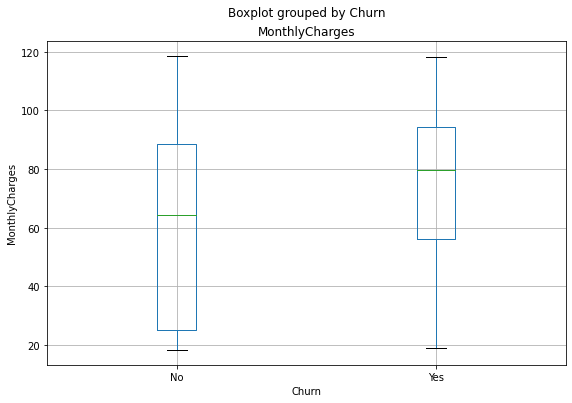

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel("MonthlyCharges")
plt.show()

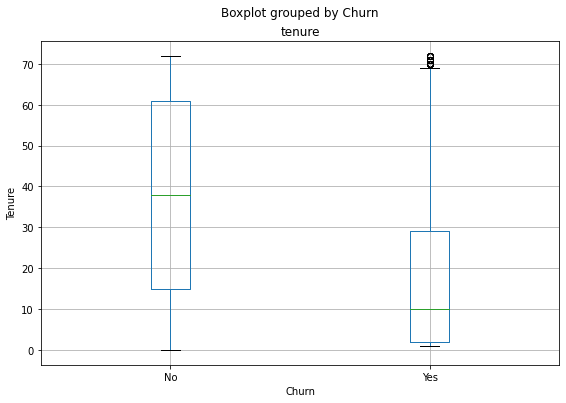

In [ ]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel("Tenure")
plt.show()

## <b> Insights from our simple EDA: </b>
* ### We can see a difference between our target classes on tenure as you can see in the second boxplot, which is good because our model (Logistic Regression) may use this to separate the two classes.
* ### There is also a slight difference between our target classes on monthly charges as shown in the first boxplot.

### Before we start predicting, an important step to do is to convert our **Churn** feature, which is a string, into integer. *Yes* will be converted to 1 and *No* will be converted to 0. We will name this new columns a "class".

In [ ]:
df[['Churn','tenure','MonthlyCharges']]

In [ ]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == "Yes" else 0)
# features will be saved as X and our target will be saved as y
X = df[['tenure','MonthlyCharges']].copy()
y = df['class'].copy()

In [ ]:
#Getting shape of dataset
df.shape

(7043, 22)

## <b> Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(5634, 2)
(1409, 2)


In [ ]:
y_train.value_counts()

0    4133
1    1501
Name: class, dtype: int64

In [ ]:
y_test.value_counts()

0    1041
1     368
Name: class, dtype: int64

## <b>Fitting logistic regression on train data

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
clf.coef_

array([[-0.05646728,  0.03315385]])

In [ ]:
# Get the model coefficients
clf.coef_

array([[-0.05646728,  0.03315385]])

In [ ]:
clf.intercept_

array([-1.77408975])

## <b>Evaluating the performance of the trained model

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

In [ ]:
X_test

,tenure,MonthlyCharges
2200,19,58.20
4627,60,116.60
3225,13,71.95
2828,1,20.45
3768,55,77.75
...,...,...
2631,7,99.25
5333,13,88.35
6972,56,111.95
4598,18,56.25


In [ ]:
test_preds

array([[0.7145149 , 0.2854851 ],
       [0.78522641, 0.21477359],
       [0.53064776, 0.46935224],
       ...,
       [0.77288679, 0.22711321],
       [0.71618111, 0.28381889],
       [0.57740038, 0.42259962]])

In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

In [ ]:
test_preds

array([0.2854851 , 0.21477359, 0.46935224, ..., 0.22711321, 0.28381889,
       0.42259962])

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [ ]:
train_class_preds

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7857649982250621
The accuracy on test data is  0.7735982966643009


#<b> <u>Learning about the confusion matrix

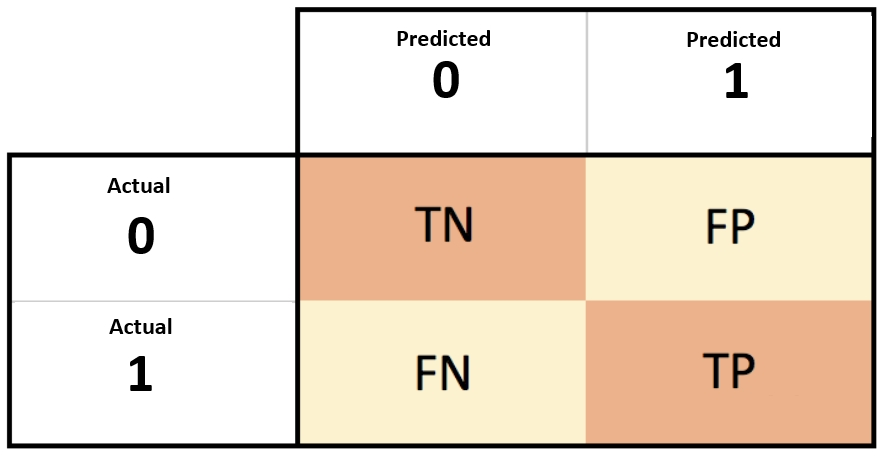

[[3745  388]
 [ 819  682]]


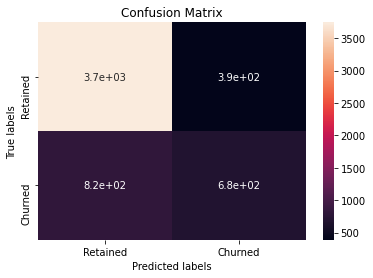

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[934 107]
 [212 156]]


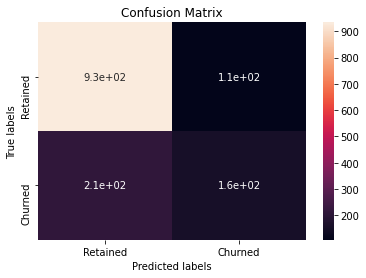

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## <b><u>Implementing Cross-validated Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [ ]:
logistic = LogisticRegression()

In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV]  ................................................................
[CV] ............. , accuracy=(train=0.785, test=0.789), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.787, test=0.791), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.788, test=0.771), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.789, test=0.775), total=   0.0s
[CV]  ................................................................
[CV] ............. , accuracy=(train=0.781, test=0.806), total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [ ]:
scores['train_accuracy']

array([0.78500111, 0.78677613, 0.78788551, 0.78877302, 0.78127773])

In [ ]:
scores['test_accuracy']

array([0.78881988, 0.79148181, 0.77107365, 0.77462289, 0.80639432])

In [ ]:
scores['estimator']

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 Log

In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.05617762  0.03293792]]
[[-0.05562275  0.03215852]]
[[-0.05820295  0.03454813]]
[[-0.05711808  0.03362381]]
[[-0.05530045  0.03257423]]


# <b><u> Evaluation metrics for classification models </u></b>

* #### <b><u>Accuracy</u></b> : Accuracy will require two inputs (i) actual class labels (ii)predicted class labels. To get the class labels from probabilities( these probabilities will be probabilities of getting a HIT), you can take a threshold of 0.5. Any probability above 0.5 will be labeled as class 1 and anything less than 0.5 will be labeled as class 0.


* #### <b><u>Precision</u></b> :  Precision for a label is defined as the number of true positives divided by the number of predicted positives. Report precision in percentages.

* #### <b><u>Recall</u></b> : Recall for a label is defined as the number of true positives divided by the total number of actual positives. Report recall in percentages.

* #### <b><u>F1-Score</u></b> : This is defined as the harmonic mean of precision and recall.

* #### <b><u>Log Loss</u></b> : This is defined as \begin{align*}
  Log Loss &= \sum_{i=1}^{M} [ y^{i}log(P^{i}) + (1- y^{i})log(1 - P^{i} )]\\
\end{align*}

 Here M refers to the number of observations and $y^{i}$ = 1 or 0 depending upon the label for the $i^{th}$ observation and $P^{i}$ is the probability of class 1 or probability of getting a HIT.

* #### <b><u>AUC-ROC</u></b> - The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems. It is a probability curve that plots the TPR against FPR at various threshold values and essentially separates the ‘signal’ from the ‘noise’. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
